## 数据可视化

In [1]:
from data import df_label, characters

num_char = df_label
num_char["length"] = num_char['label'].apply(len)

def count_char(label):
    count_lists = [label.count(char) for char in characters]
    return count_lists

for i, char in enumerate(characters):
    num_char[char] = [num[i] for num in num_char.label.apply(count_char)]

num_char.head()

,label,length,0,1,2,3,4,5,6,7,8,9,+,-,*,=,(,)
filename,,,,,,,,,,,,,,,,,,
train/0.jpg,(0+0)+9=9,9,2,0,0,0,0,0,0,0,0,2,2,0,0,1,1,1
train/1.jpg,9*8+6=78,8,0,0,0,0,0,0,1,1,2,1,1,0,1,1,0,0
train/2.jpg,1+7+0=8,7,1,1,0,0,0,0,0,1,1,0,2,0,0,1,0,0
train/3.jpg,5+4+9=18,8,0,1,0,0,1,1,0,0,1,1,2,0,0,1,0,0
train/4.jpg,7-(1*7)=0,9,1,1,0,0,0,0,0,2,0,0,0,1,1,1,1,1


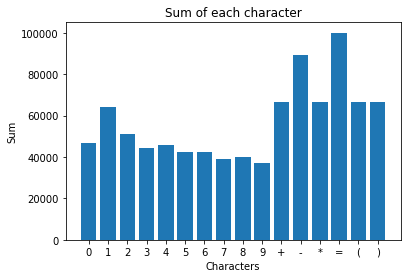

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fig,ax = plt.subplots()

ax.bar(range(1,len(characters)+1),num_char.loc[:,list(characters)].sum(axis=0))
ticks = ax.set_xticks(range(1,len(characters)+1))
labels = ax.set_xticklabels(characters)
xlabel = ax.set_xlabel('Characters')
ylabel = ax.set_ylabel('Sum')
title = ax.set_title('Sum of each character')

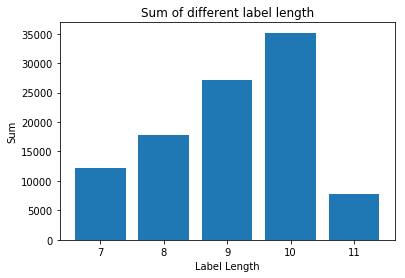

In [3]:
plt.bar(num_char["length"].value_counts().index.tolist(), num_char["length"].value_counts())
plt.xlabel('Label Length') 
plt.ylabel('Sum')
title = plt.title('Sum of different label length')

## 随机验证码模型构建

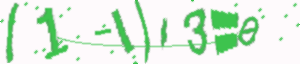

In [4]:
from captcha.image import ImageCaptcha
from PIL import Image
import os
import string
import random

characters = string.digits + '+-*=()'
width, height, n_len, n_class = 300, 64, 15, len(characters)+1
generator = ImageCaptcha(width=width, height=height, font_sizes=range(35, 56), 
                         fonts=['fonts/%s'%x for x in os.listdir('fonts') if '.tt' in x])
generator.generate_image('(1-1)*3=0')

In [28]:
def gen_captcha(batch_size = 50):
    X = np.zeros([batch_size,height,width,1])
    img = np.zeros((height,width),dtype=np.uint8)
    Y = np.zeros([batch_size,n_len,n_class])
    image = generator

    while True:
        for i in range(batch_size):
            captcha_str = ''.join(random.sample(characters,n_len))
            img = image.generate_image(captcha_str).convert('L')
            img = np.array(img.getdata())
            X[i] = np.reshape(img,[height,width,1])/255.0
            for j,ch in enumerate(captcha_str):
                Y[i,j,characters.find(ch)] = 1
        Y = np.reshape(Y,(batch_size,n_len*n_class))
        yield X,Y
        
def gen_test_captcha():
        image = ImageCaptcha(width ,height)
        captcha_str = ''.join(random.sample(characters,n_len))
        img = image.generate_image(captcha_str)
        img.save(captcha_str + '.jpg')

In [31]:
g = gen_captcha(batch_size = 50)
gen_test_captcha()

OSError: [Errno 22] Invalid argument: '0)3*1=9645872(-.jpg'

参考：
1. [百度魅族深度学习大赛初赛冠军作品(图像识别.源码)](https://cloud.tencent.com/developer/article/1062013)
2. [徐勇皇(Angus Xu)的机器学习工程师毕业项目](https://github.com/anguschowchowxu/mathematical_expression_recognition)